# Blue Book for Bulldozers
The objective was to predict the auction sale price for a piece of heavy equipment to create a "blue book" for bulldozers. The dataset has been obtained from a Kaggle competition and can be found <a href="https://www.kaggle.com/c/bluebook-for-bulldozers/data">here</a>.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

## Import Datasets

In [2]:
#Imported the combined Train and Validation dataset.
data = pd.read_csv('TrainAndValid.csv')
test = pd.read_csv('Test.csv')

In [3]:
#Assinging SalePrice to target and taking log of it to scale it
target = data['SalePrice']
target = np.log(target)

In [4]:
data.drop('SalePrice', axis=1, inplace=True)

In [5]:
# data.head()

In [6]:
# data.shape

In [7]:
# test.shape

In [8]:
#Checking percentage of missing data
percent_missing = (data.isnull().sum()/len(data)).sort_values(ascending=False) * 100
percent_missing_test = (test.isnull().sum()/len(test)).sort_values(ascending=False) * 100
percent_missing= pd.DataFrame(percent_missing[percent_missing>0])
percent_missing_test= pd.DataFrame(percent_missing_test[percent_missing_test>0])

## Exploratory Data Analysis

### Missing Values in the train and test dataset

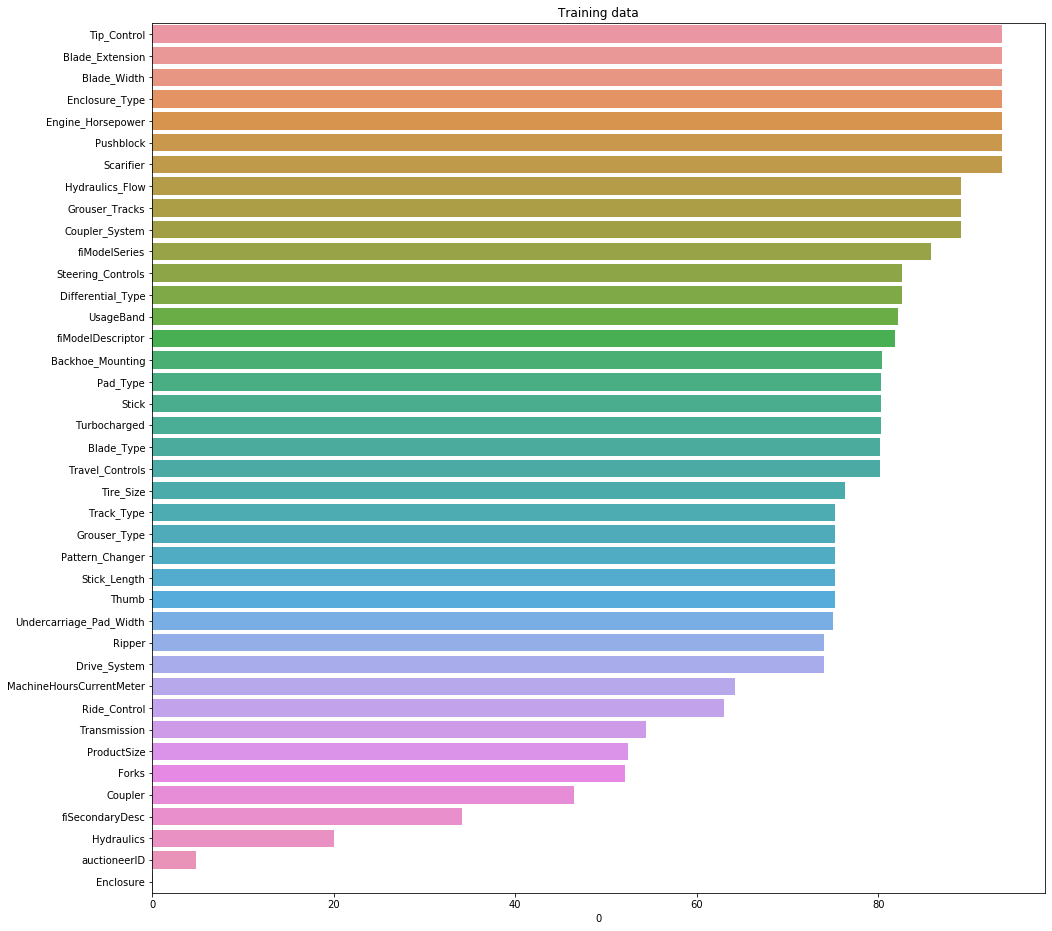

In [13]:
#The plot below indicates the percentage of missing values present in the training data with respect to each feature. 
plt.figure(figsize=(16,16))
plt.title("Training data")
sns.barplot(y=percent_missing.index, x=percent_missing[0], orient='h' )

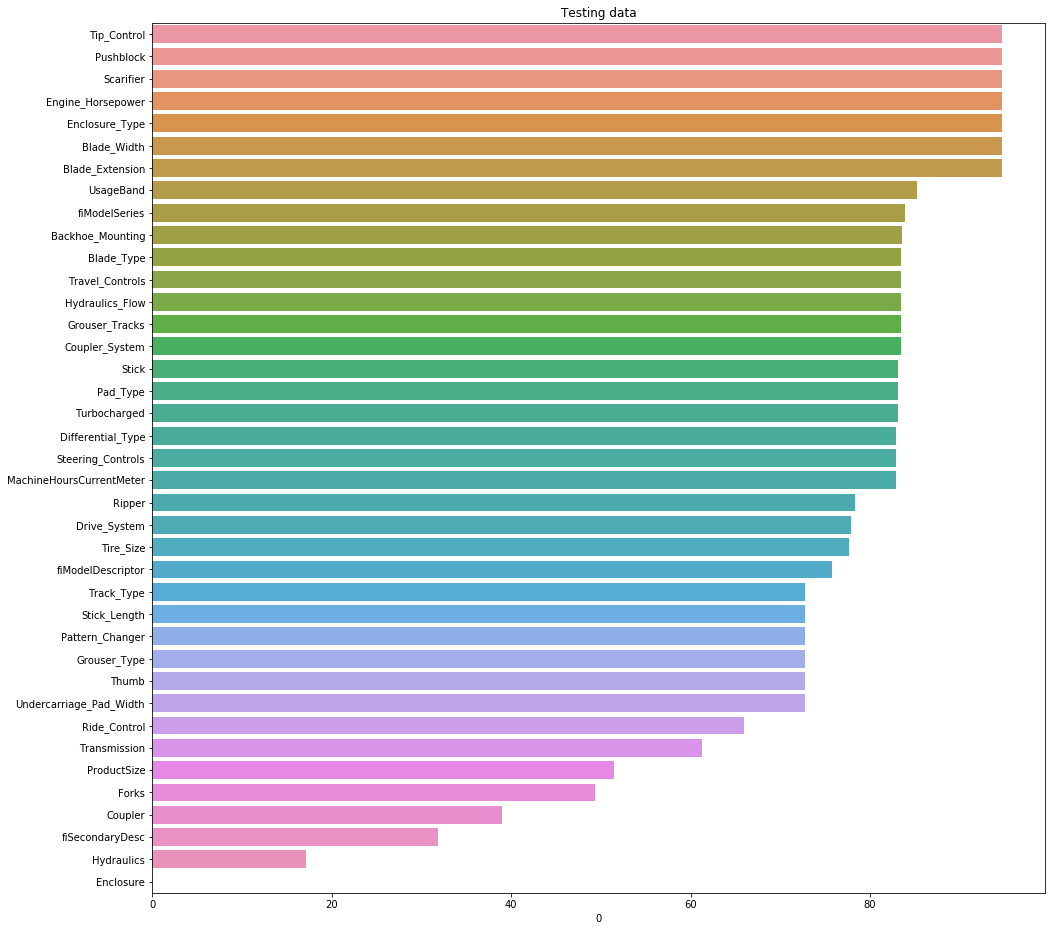

In [14]:
#The plot below indicates the percentage of missing values present in the test data with respect to each feature. 
plt.figure(figsize=(16,16))
plt.title("Testing data")
sns.barplot(y=percent_missing_test.index, x=percent_missing_test[0], orient='h' )

In [15]:
missing_cols = pd.DataFrame(percent_missing.index)

In [16]:
missing_cols_test = pd.DataFrame(percent_missing_test.index)

In [17]:
# set(percent_missing.index).difference(percent_missing_test.index)

### Missing values in the categorical and numerical features

In [18]:
cat_feat = data.select_dtypes(include=['object'])

In [19]:
cat_feat_test = test.select_dtypes(include=['object'])

In [20]:
num_feat = data.select_dtypes(exclude=['object'])

In [21]:
num_feat_test = test.select_dtypes(exclude=['object'])

In [24]:
cat_percent_missing = (cat_feat.isnull().sum()/len(cat_feat)).sort_values(ascending=False) * 100

In [25]:
cat_percent_missing= pd.DataFrame(cat_percent_missing[cat_percent_missing>0])

In [26]:
cat_percent_missing_test = (cat_feat_test.isnull().sum()/len(cat_feat_test)).sort_values(ascending=False) * 100
cat_percent_missing_test = pd.DataFrame(cat_percent_missing_test[cat_percent_missing_test>0])

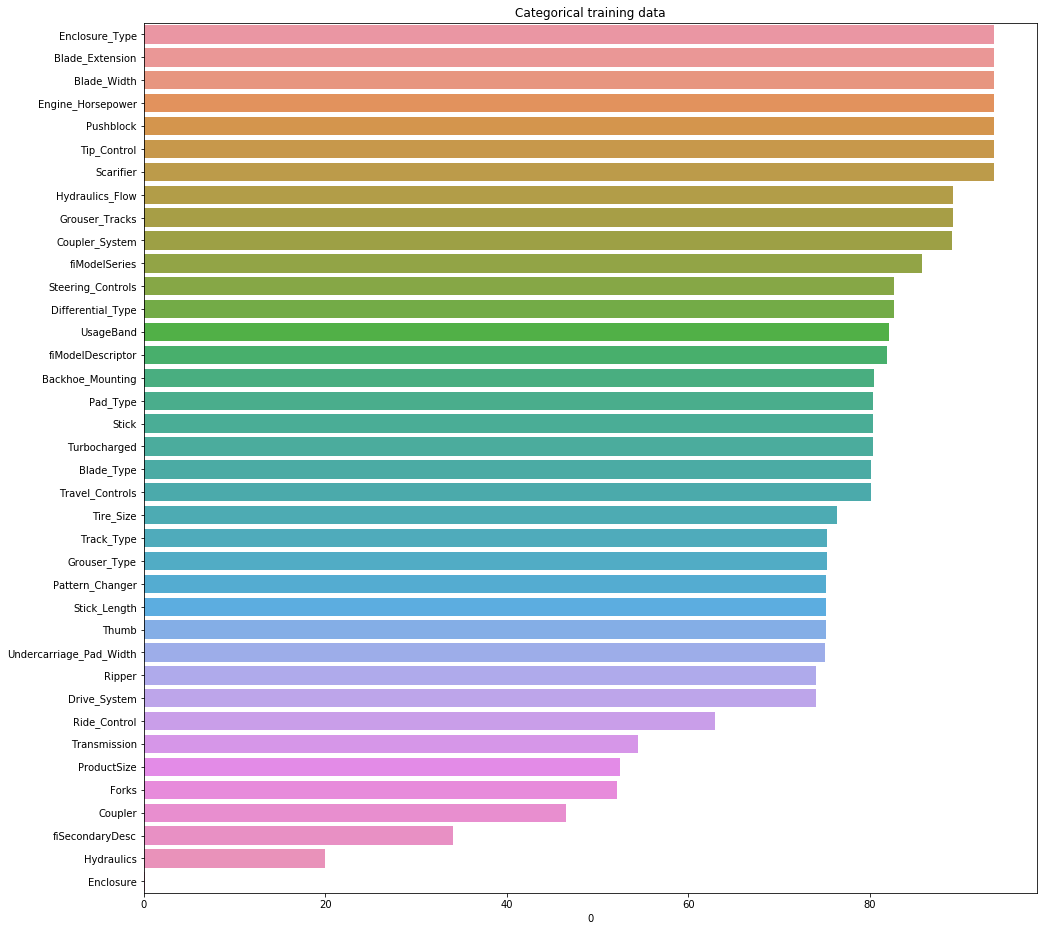

In [27]:
#The plot below indicates the percentage of missing values present in the training data with respect to categorical features. 
plt.figure(figsize=(16,16))
plt.title("Categorical training data")
sns.barplot(y=cat_percent_missing.index, x=cat_percent_missing[0], orient='h' )

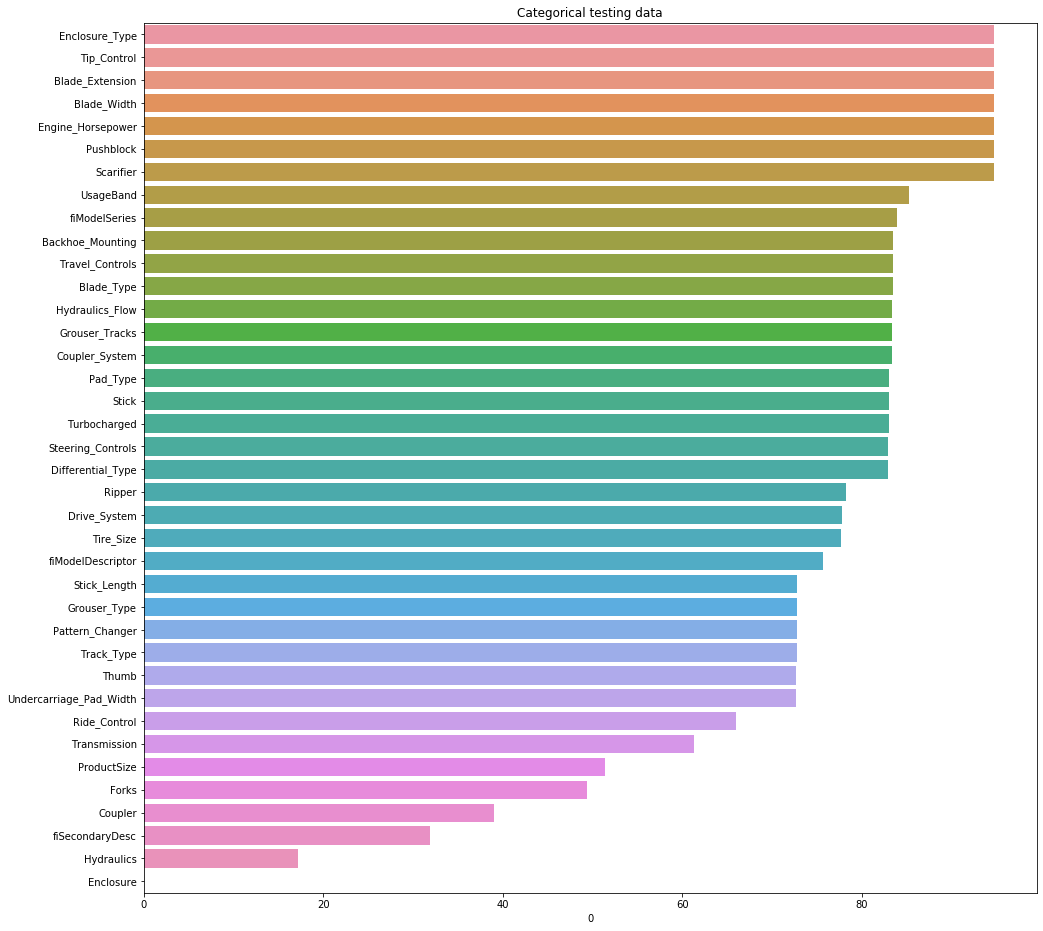

In [28]:
#The plot below indicates the percentage of missing values present in the test data with respect to categorical features. 
plt.figure(figsize=(16,16))
plt.title("Categorical testing data")
sns.barplot(y=cat_percent_missing_test.index, x=cat_percent_missing_test[0], orient='h' )

## Data Pre-Processing

### Checking the number of unique values in each categorical feature

In [29]:
uni_val = []
for col in cat_feat.columns:
    uni_val.append(cat_feat[col].nunique())

In [30]:
uni_val = pd.DataFrame(uni_val, index=cat_feat.columns, columns={'value'})

In [31]:
uni_val_test = []
for col in cat_feat_test.columns:
    uni_val_test.append(cat_feat_test[col].nunique())
uni_val_test = pd.DataFrame(uni_val_test, index=cat_feat_test.columns, columns={'value'})

In [32]:
#Dropping these features as filModelDesc = fiBaseModel + fiSecondaryDesc + fiModelSeries + fiModelDescriptor
cat_feat.drop(['fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor'], inplace=True, axis=1)

In [33]:
#Similarly dropping these features as filModelDesc = fiBaseModel + fiSecondaryDesc + fiModelSeries + fiModelDescriptor
cat_feat_test.drop(['fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor'], inplace=True, axis=1)

In [34]:
# cat_feat.head()
# cat_feat_test.head()
# cat_feat.columns
# cat_feat_test.columns
# cat_feat.ProductSize.value_counts()
# cat_feat_test.ProductSize.value_counts()
# cat_feat.UsageBand.value_counts()
# cat_feat_test.UsageBand.value_counts()
# cat_feat.UsageBand.isnull().sum()/len(data)*100
# cat_feat_test.UsageBand.isnull().sum()/len(cat_feat_test)*100
# cat_feat.ProductSize.isnull().sum()/len(data)*100
# cat_feat_test.ProductSize.isnull().sum()/len(cat_feat_test)*100

### Handling Missing Values

In [46]:
cat_feat.UsageBand.fillna('-999', inplace=True)
cat_feat.ProductSize.fillna('-999', inplace=True)

In [47]:
cat_feat_test.UsageBand.fillna('-999', inplace=True)
cat_feat_test.ProductSize.fillna('-999', inplace=True)

#### Filling UsageBand on the basis of ProductSize and vice versa

In [48]:
usageBand = []
for i in range(len(cat_feat)):
    if cat_feat.UsageBand[i]=='-999' and cat_feat.ProductSize[i] != '-999':
        if cat_feat.ProductSize[i] == 'Mini':
            usageBand.append('Low')
        elif cat_feat.ProductSize[i] == 'Medium' or cat_feat.ProductSize[i] == 'Small' or cat_feat.ProductSize[i] == 'Compact':
            usageBand.append('Medium')
        else:
            usageBand.append('High')
    else:
        usageBand.append(cat_feat.UsageBand[i])

In [49]:
usageBand_test = []
for i in range(len(cat_feat_test)):
    if cat_feat_test.UsageBand[i]=='-999' and cat_feat_test.ProductSize[i] != '-999':
        if cat_feat_test.ProductSize[i] == 'Mini':
            usageBand_test.append('Low')
        elif cat_feat_test.ProductSize[i] == 'Medium' or cat_feat_test.ProductSize[i] == 'Small' or cat_feat_test.ProductSize[i] == 'Compact':
            usageBand_test.append('Medium')
        else:
            usageBand_test.append('High')
    else:
        usageBand_test.append(cat_feat_test.UsageBand[i])

In [53]:
cat_feat['UsageBand'] = usageBand

In [54]:
cat_feat_test['UsageBand'] = usageBand_test

In [55]:
productSize = []
for i in range(len(cat_feat)):
    if cat_feat.ProductSize[i] == '-999' and cat_feat.UsageBand[i]!='-999':
        if cat_feat.UsageBand[i] == 'Low':
            productSize.append('Mini')
        elif cat_feat.UsageBand[i] == 'Medium':
            productSize.append('Medium')
        else:
            productSize.append('Large')
    else:
        productSize.append(cat_feat.ProductSize[i])

In [56]:
productSize_test = []
for i in range(len(cat_feat_test)):
    if cat_feat_test.ProductSize[i] == '-999' and cat_feat_test.UsageBand[i]!='-999':
        if cat_feat_test.UsageBand[i] == 'Low':
            productSize_test.append('Mini')
        elif cat_feat_test.UsageBand[i] == 'Medium':
            productSize_test.append('Medium')
        else:
            productSize_test.append('Large')
    else:
        productSize_test.append(cat_feat_test.ProductSize[i])

In [57]:
# pd.DataFrame(productSize)[0].value_counts()
# pd.DataFrame(productSize_test)[0].value_counts()
# len(productSize), len(productSize_test)
# pd.DataFrame(usageBand, columns={'usageBand'})['usageBand'].value_counts()
# pd.DataFrame(usageBand_test, columns={'usageBand'})['usageBand'].value_counts()
# len(usageBand), len(usageBand_test)

In [60]:
cat_feat.ProductSize = productSize

In [61]:
cat_feat_test.ProductSize = productSize_test

In [63]:
# Using saleDate and YearMade to define a new feature Age of the heavy equipment
saleyear = []
for i in range(len(cat_feat)):
    saleyear.append(int(cat_feat['saledate'][i].split()[0].split('/')[2]))

In [64]:
num_feat['saleYear'] = saleyear

In [65]:
num_feat['Age'] = num_feat['saleYear'] - num_feat['YearMade']

In [66]:
num_feat.drop(['saleYear', 'YearMade'], axis=1, inplace=True)

In [67]:
cat_feat.drop('saledate', axis=1, inplace=True)

In [68]:
saleyear_test = []
for i in range(len(cat_feat_test)):
    saleyear_test.append(int(cat_feat_test['saledate'][i].split()[0].split('/')[2]))
num_feat_test['saleYear'] = saleyear_test
num_feat_test['Age'] = num_feat_test['saleYear'] - num_feat_test['YearMade']
num_feat_test['Age'] = num_feat_test['saleYear'] - num_feat_test['YearMade']
num_feat_test.drop(['saleYear', 'YearMade'], axis=1, inplace=True)
cat_feat_test.drop('saledate', axis=1, inplace=True)

In [69]:
num_feat = pd.concat([num_feat, pd.get_dummies(cat_feat['UsageBand'])], axis=1)

In [70]:
num_feat_test = pd.concat([num_feat_test, pd.get_dummies(cat_feat_test['UsageBand'])], axis=1)

### Label Encoding

In [73]:
from fastai.imports import *
from fastai.structured import *

In [74]:
train = pd.concat([num_feat, cat_feat.astype('category'), target], axis=1)

In [75]:
test_df = pd.concat([num_feat_test, cat_feat_test.astype('category')], axis=1)

In [76]:
train.shape, test_df.shape

((412698, 52), (12457, 51))

In [77]:
train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,MachineHoursCurrentMeter,Age,-999,High,Low,...,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,SalePrice
0,1139246,999089,3157,121,3.0,68.0,2,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,11.097410
1,1139248,117657,77,121,3.0,4640.0,8,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,10.950807
2,1139249,434808,7009,121,3.0,2838.0,3,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.210340
3,1139251,1026470,332,121,3.0,3486.0,10,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.558414
4,1139253,1057373,17311,121,3.0,722.0,2,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.305651


In [78]:
#Using fastai library to label encode the datasets
df, y, nas = proc_df(train, 'SalePrice')

## Modeling

In [79]:
#Importing the Libraries for Modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, make_scorer

In [80]:
rf = RandomForestRegressor(n_jobs=-1)

In [83]:
#Train Test Split on the training dataset
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=1)

In [287]:
#Training a baseline Random Forest Regressor
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [288]:
#Predicting on the splitted training dataset using the initial baseline model
pred = rf.predict(X_test)

### Defining the metric: Root Mean Squared Log Error

In [289]:
mean_squared_error(pred, y_test)

0.056731463473842385

In [84]:
#Function defined for calculating the root mean squared log error
def rmsle(p, a):
    sum = 0
    for i in  range(0,len(p)):
        sum += math.pow(math.log(float(p[i]) + 1) - math.log(float(a[i]) + 1),2)
    sum = sum * (1/len(p))
    return float(math.sqrt(sum))

In [293]:
error = rmsle(np.exp(pred), np.exp(y_test))

In [299]:
print(error)

0.2381716487809174


### Tuning the hyperparameters for Random Forest

In [88]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 3)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 100, num = 3)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [89]:
mse = make_scorer(mean_squared_error)

In [90]:
rf_random = RandomizedSearchCV(estimator = rf, scoring=mse, param_distributions = random_grid, cv = 2, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(df,y)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed: 24.8min remaining:  6.2min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 37.3min finished


RandomizedSearchCV(cv=2, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [200, 600, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 55, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn',
          scoring=make_scorer(mean_squared_error), verbose=2)

In [92]:
#Using the optimal hyperparamters obtained above to train the model
rf_random.best_estimator_.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [94]:
#Predicting on the splitted training dataset using the new hyperparameters
pred_ht=rf_random.best_estimator_.predict(X_test)

In [95]:
#This indicates the change in the accuracy of the model with the new hyperparameters
rmsle(np.exp(pred_ht), np.exp(y_test))

0.24881865963344546

In [96]:
df.shape

(412698, 53)

In [97]:
test_df.shape

(12457, 51)

In [98]:
df_test,y,nas = proc_df(test_df)

In [99]:
df.shape, df_test.shape

((412698, 53), (12457, 52))

In [100]:
# Checking for feature difference between training and test set
set(df.columns).difference(set(df_test.columns))

{'auctioneerID_na'}

In [101]:
data.auctioneerID.isnull().sum(), test.auctioneerID.isnull().sum()

(20136, 0)

In [102]:
df_test['auctioneerID_na'] = False
# set(df.columns).difference(set(df_test.columns))

set()

### Predicting on the test dataset

In [103]:
pred_test = rf.predict(df_test)

In [104]:
pred_test = np.exp(pred_test)

In [105]:
sub = pd.DataFrame({'SalesID': test_df.SalesID, 'SalePrice': pred_test})

In [107]:
sub.to_csv('sub.csv', index=False)